# Background
New York City's (NYC) Taxi & Limousine Commission (TLC) fills in the gaps left by the city's public transit networks, serving as an essential link. A taxi can readily service routes and locations that buses or trains may not be able to. This makes it the perfect option for people who live in suburban areas or other less accessible areas because it provides a smooth link to a variety of locations without the inconvenience of transfers or complicated routing. We will analyze NYC TLC data as part of the Purwadhika Capstone Project in order to identify issues and possible solutions. The data is taken from https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page.


## Problem Statement
In today's world of fierce digital competition, increasing the profitability of taxi services through analysis of consumer behavior and preference is a challenging task. **A solid understanding of operational dynamics and customer behaviour is essential to successfully navigate this difficulty.** Through more in-depth exploration of **taxi operations data**, we may identify more focused and precise solutions. To maximize operations and boost profitability in the taxi sector, it is critical to **comprehend client demand and revenue**. These are the following problems that we want to anaylze:

**where are the taxi demand?** and **which brings most revenue?**.

# Data Understanding and Cleaning

In [1]:
#import2 field
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from scipy.stats import kstest, shapiro

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# read data

main_data = pd.read_csv('/content/NYC TLC Trip Record.csv',  engine='python')
location_data = pd.read_csv('/content/taxi_zone_lookup.csv',  engine='python')

In [3]:
display(main_data.head(), main_data.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [4]:
display(location_data.head(), location_data.tail())

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


## Data Dictionary

Before getting into the analysis, we need to know more about our dataset in the data understanding stage. From this process, we will know what anomalies are in our dataset and need to be handled in the data cleaning stage. Each anomaly handled will be accompanied by a justification of the steps taken, both in domain knowledge and statistically.

**Desription Features of Main Data**

| Features                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``VendorID``               | Kode ID yang menunjukkan vendor taksi.                                                                                        |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                         |
|                           | 2 = VeriFone Inc.                                                                                                             |   
|``lpep_pickup_datetime``   | Tanggal dan waktu saat perjalanan taksi dimulai.                                                                              |
|``lpep_dropoff_datetime``  | Tanggal dan waktu saat perjalanan taksi berakhir.                                                                             |
|``store_and_fwd_flag``     | Menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor. Y berarti "simpan dan lanjutkan", N berarti bukan perjalanan "simpan dan lanjutkan".                                                                                                                    |
|``RatecodeID``             | Kode tarif untuk perjalanan.                                                                                                  |
|                           |1 = Tarif standar                                                                                                              |
|                           |2 = JFK                                                                                                                        |
|                           |3 = Newark                                                                                                                     |
|                           |4 = Nassau atau Westchester                                                                                                    |
|                           |5 = Tarif yang dinegosiasikan                                                                                                  |
|                           |6 = Perjalanan kelompok.                                                                                                       |
|``PULocationID``           | ID lokasi penjemputan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.                                  |
|``DOLocationID``           | ID lokasi penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) dinonaktifkan.                                 |
|``passenger_count``        | Jumlah penumpang di dalam kendaraan.                                                                                          |
|``trip_distance``          | Jarak perjalanan dalam mil.                                                                                                   |
|``fare_amount``            | Tarif yang diukur untuk perjalanan.                                                                                           |
|``extra``                  | Biaya tambahan. Saat ini, ini hanya mencakup biaya tambahan 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.            |
|``mta_tax``                | Pajak MTA sebesar 0,50 dolar yang otomatis aktif berdasarkan tarif yang diukur yang digunakan.                                |
|``tip_amount``             | Jumlah tip. Bidang ini otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk.                                       |
|``tolls_amount``           | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                                                    |
|``ehail_fee``              | Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.           |
|``improvement_surcharge``  | Biaya tambahan sebesar 0,30 dolar yang dinilai pada awal perjalanan. Biaya tambahan ini mulai dikenakan pada tahun 2015.      |
|``total_amount``           | Jumlah total yang dikenakan kepada penumpang. Bidang ini mencakup tarif yang diukur, biaya tambahan, mta_tax, tip_amount, dan tolls_amount ditambah biaya tambahan ehail atau improvement_surcharge.                                                                                                   |
|``payment_type``           | Kode numerik yang menunjukkan metode pembayaran.                                                                              |
|``trip_type``              | Kode yang menunjukkan apakah perjalanan adalah dari sisi jalan atau dari pengiriman yang otomatis ditetapkan berdasarkan tarif yang diukur yang digunakan tetapi dapat diubah oleh pengemudi.                                                                                                               |
|                           | 1 = Street-hail                                                                                                               |
|                           | 2 = Dispatch                                                                                                                  |
|``congestion_surcharge``   | Biaya kemacetan sebesar 2,75 dolar untuk perjalanan dengan taksi kuning dan hijau di Manhattan selatan dari 96th St. Biaya tambahan ini mulai dikenakan pada tahun 2019.                                                                                                                                  |

**Desription Features of Location Data**

| Features                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``Location ID``   | ID Lokasi yang unik.                                                                              |
|``Burough``  | Burough atau Kecamatan dalam Bahasa Indonesia.                                                                             |
|``Zone``     | Zona atau Kelurahan dalam Bahasa Indonesia.                                                                                                                    |
|``Service Zone``             | Zona pelayanan Taksi.

## Missing Values

### Location Data
**Karena data lokasi relatif simpel, kita cukup fill missing value dengan Unknown** karena kita akan melakukan join data dengan struktur

Left Join(Main Data, Location Data).

In [5]:
#Location data
#Fill Missing Value
location_data.fillna('Unknown', inplace=True)
display(location_data.head(),location_data.tail())

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,Unknown,Unknown
264,265,Unknown,Outside of NYC,Unknown


### Gabungkan Main Data dan Location Data menjadi Combined Data

Agar bisa dianalisis menggunakan lokasi dengan lebih enak

In [6]:
#Combined Data
combined_data = pd.merge(main_data, location_data.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
combined_data = pd.merge(combined_data, location_data.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")

In [7]:
#Combined Data
display(combined_data.head(), combined_data.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,...,29.40,NaN,NaN,NaN,Brooklyn,Williamsburg (South Side),Boro Zone,Manhattan,Lenox Hill East,Yellow Zone


### Combined Data

**Sekarang kita cek Combined Data**

Karena kita mencari analisis demand dan revenue, kita ubah tipe data kategorik kita ganti tipenya ke "Object", data tanggal menjadi datetime, dan menghapus variabel yang tidak penting berdasarkan dictionary terlebih dahulu

In [8]:
combined_data['RatecodeID'] = combined_data['RatecodeID'].astype('object')
combined_data['PULocationID'] = combined_data['PULocationID'].astype('object')
combined_data['DOLocationID'] = combined_data['DOLocationID'].astype('object')
combined_data['payment_type'] = combined_data['payment_type'].astype('object')
combined_data['trip_type'] = combined_data['trip_type'].astype('object')

In [9]:
combined_data['lpep_pickup_datetime'] = pd.to_datetime(combined_data['lpep_pickup_datetime'])
combined_data['lpep_dropoff_datetime'] = pd.to_datetime(combined_data['lpep_dropoff_datetime'])

In [10]:
#Remove Columns based on dictionary
combined_data.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount'], axis=1, inplace=True)

In [11]:
display(combined_data.head(), combined_data.tail())

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,49,62,NaN,4070.82,15.70,0.00,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,10,205,NaN,2.14,4.41,0.00,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,66,37,NaN,3.44,16.53,3.51,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,225,189,NaN,3.03,14.98,3.20,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone
68210,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,256,140,NaN,5.82,23.65,2.00,NaN,NaN,Brooklyn,Williamsburg (South Side),Boro Zone,Manhattan,Lenox Hill East,Yellow Zone


In [12]:
#Combined Data
#Info Table
pd.DataFrame({
    'variable_name': combined_data.columns.values,
    'variable_type': combined_data.dtypes.values,
    'variable_count': len(combined_data),
    'missing_value%': combined_data.isna().mean().values * 100,
    'duplicate' : combined_data.duplicated().sum(),
    'n_unique': combined_data.nunique().values,
    'sample_unique': [combined_data[col].unique() for col in combined_data.columns]}
).round(3)

,variable_name,variable_type,variable_count,missing_value%,duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,datetime64[ns],68211,0.000,3,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,datetime64[ns],68211,0.000,3,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,RatecodeID,object,68211,6.339,3,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
3,PULocationID,object,68211,0.000,3,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
4,DOLocationID,object,68211,0.000,3,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
5,passenger_count,float64,68211,6.339,3,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
6,trip_distance,float64,68211,0.000,3,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
7,fare_amount,float64,68211,0.000,3,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."
8,tip_amount,float64,68211,0.000,3,1492,"[4.03, 2.64, 1.94, 1.7, 0.0, 4.85, 1.0, 3.0, 3..."
9,payment_type,object,68211,6.339,3,5,"[1.0, 2.0, 3.0, 4.0, 5.0, nan]"


Kita akan visualisasikan hubungan antar missing values. Terlihat bahwa posisi data yang memiliki missing value itu mendekati sama, namun masih memiliki  fare_amount (target untuk optimalisasi revenue). **Ternyata selain kolom passenger_count yang numerik, kolom dengan missing value semuanya bersifat kategorial, kita akan lakukan data cleaning untuk masing-masing variabel.**

<Axes: >

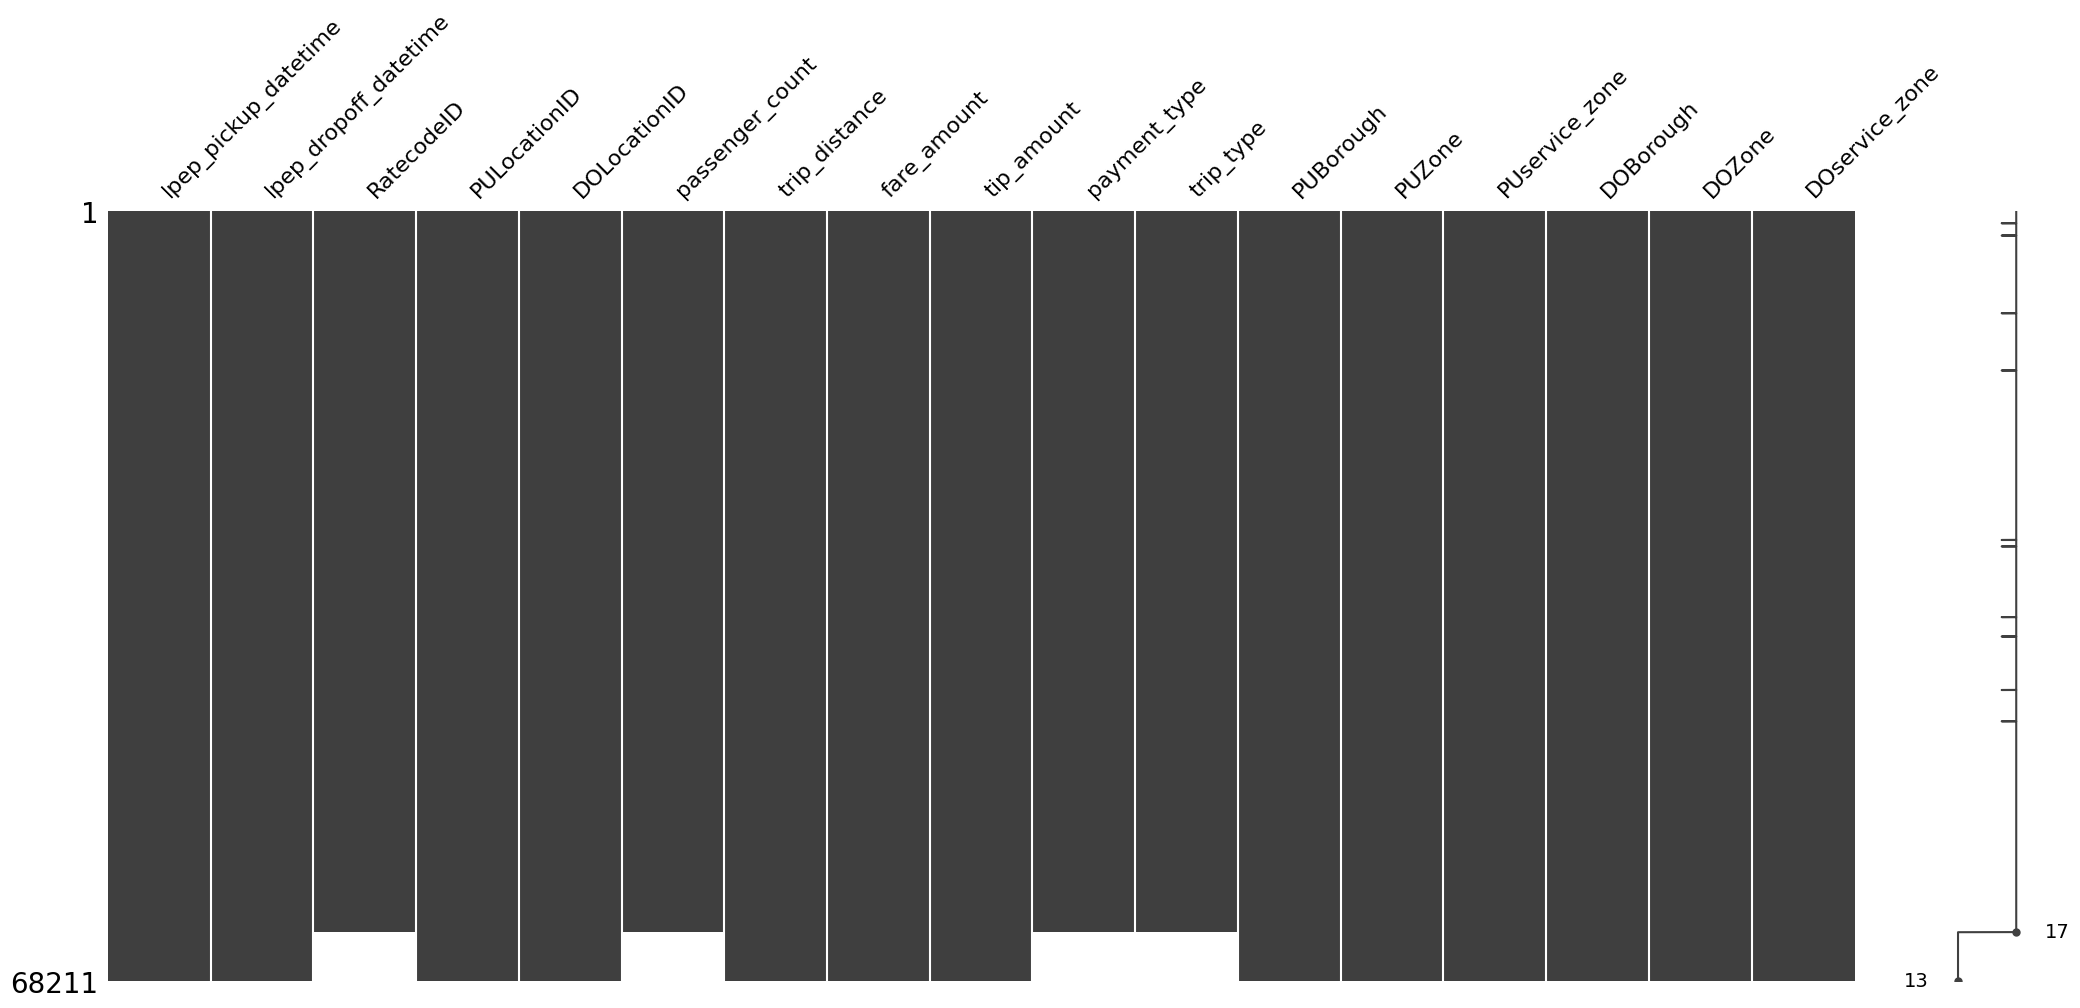

In [13]:
#Combined Data
#Hubungan antar missing values secara visualisasi
missingno.matrix(combined_data)

####RatecodeID

Pada website https://www.nyc.gov/site/tlc/passengers/taxi-fare.page, terdapat **domain knowledge** yang dapat diikuti dalam memasukkan kode tarif, yakni:



| Jenis Perjalanan                  | Kode Tarif                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|Dalam Kota (Inner City limit)           | Rate #01 - Standard City Rate
|Manhattan <-> Bandara John F. Kennedy (JFK)             | Rate #02 - JFK Airport*
|Ke Bandara Newark (EWR)               | Rate #03 - Newark Airport
|Luar Kota (Nassau or Westchester)               | Rate #04 - Out of City Rate to Nassau or Westchester
|Luar Kota (Other Points)               | Rate #05 - Out of City Negotiated Flat Rate


*) Trips between John F. Kennedy Airport (JFK) and other New York City destinations are charged the standard metered fare.

**)Trips to and from LaGuardia Airport (LGA) are charged the standard metered fare...

In [14]:
# Fill missing RatecodeID based on Rules
# Manhattan <-> JFK Airport
combined_data['RatecodeID'] = np.where(
    ((combined_data['RatecodeID'].isna()) | (combined_data['RatecodeID']==99)) &
    ((combined_data['PUZone'] == 'JFK Airport') & (combined_data['DOBorough'] == 'Manhattan') |
     (combined_data['DOZone'] == 'JFK Airport') & (combined_data['PUBorough'] == 'Manhattan')),
    2, combined_data['RatecodeID']
)

# To EWR Airport
combined_data['RatecodeID'] = np.where(
    ((combined_data['RatecodeID'].isna()) | (combined_data['RatecodeID']==99)) &
    ((combined_data['DOBorough'] == 'EWR') & (combined_data['PUBorough'].isin(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']))),
    3, combined_data['RatecodeID']
)

# Standard City Rate
combined_data['RatecodeID'] = np.where(
    ((combined_data['RatecodeID'].isna()) | (combined_data['RatecodeID']==99)) &
    (combined_data['PUBorough'].isin(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])) &
    (combined_data['DOBorough'].isin(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])),
    1, combined_data['RatecodeID']
)


Kita lihat hasil setelah menggunakan rule based cleaning, Missing Value hanya tersisa 20. Kita cek dahulu NaNnya.

Ternyata karena Drop Off Borough "Unknown". Namun, karena **kita tidak bisa membedakan**
1. Luar Kota (Nassau or Westchester) dan
2. Luar Kota (Other Points)

maka kita masukkan ke modus antara 2 opsi tersebut yakni **RatecodeID 5 (Luar Kota (Other Points)).**

In [15]:
combined_data['RatecodeID'].value_counts(dropna=False)

,count
RatecodeID,
1.0,66367
5.0,1529
2.0,203
4.0,57
3.0,34
NaN,20
99.0,1


In [16]:
combined_data[((combined_data['RatecodeID'].isna()) | (combined_data['RatecodeID']==99))][['RatecodeID','DOLocationID',   'DOZone','PUBorough', 'DOBorough']].value_counts(dropna=False)

RatecodeID  DOLocationID  DOZone          PUBorough  DOBorough
NaN         265           Outside of NYC  Brooklyn   Unknown      6
                                          Bronx      Unknown      4
                                          Manhattan  Unknown      4
                                          Queens     Unknown      4
            264           Unknown         Manhattan  Unknown      2
99.0        123           Homecrest       Unknown    Brooklyn     1
Name: count, dtype: int64

In [17]:
# Out of City Rate Modus
combined_data['RatecodeID'] = np.where(
    ((combined_data['RatecodeID'].isna()) | (combined_data['RatecodeID']==99)), 5, combined_data['RatecodeID']
)

combined_data['RatecodeID'].value_counts(dropna=False)

,count
RatecodeID,
1.0,66367
5.0,1550
2.0,203
4.0,57
3.0,34


####passenger_count

Karena numerik, gunakan tendensi sentral (mean or median) yang dibulatkan ke nilai terdekat, yakni 1.

In [18]:
print(f"Data passenger_count memiliki \nMean: {combined_data['passenger_count'].mean().round(3)} \nMedian: {combined_data['passenger_count'].median().round(3)}")
print("Kita memilih angka bulat untuk data ini, yakni 1")

Data passenger_count memiliki 
Mean: 1.316 
Median: 1.0
Kita memilih angka bulat untuk data ini, yakni 1


In [19]:
combined_data['passenger_count'].fillna(combined_data['passenger_count'].median(), inplace=True)

print(combined_data['passenger_count'].value_counts(dropna=False))

passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64


Perlu diganti passenger_count = 0 dengan modus.

In [20]:
combined_data[((combined_data['passenger_count']!=0))][['trip_type','passenger_count']].value_counts(dropna=False).sort_index()

trip_type  passenger_count
1.0        1.0                53190
           2.0                 4912
           3.0                  904
           4.0                  345
           5.0                 1761
           6.0                 1053
2.0        1.0                 1099
           2.0                  184
           3.0                   54
           4.0                   19
           5.0                   11
           6.0                    1
           7.0                    4
           8.0                    2
           9.0                    2
NaN        1.0                 4334
Name: count, dtype: int64

In [21]:
combined_data[((combined_data['passenger_count']==0))][['trip_type','passenger_count']].value_counts(dropna=False)

,,count
trip_type,passenger_count,
1.0,0.0,311
2.0,0.0,25


In [22]:
combined_data['passenger_count'] = np.where(
    ((combined_data['passenger_count']==0)),
    1, combined_data['passenger_count']
)

In [23]:
print(combined_data['passenger_count'].value_counts(dropna=False))

passenger_count
1.0    58959
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64


####payment_type

Dari data dictionary dikutip

"Jumlah tip. **Bidang ini otomatis diisi untuk tip kartu kredit**. Tip tunai tidak termasuk."

Maka kita menemukan domain knowledge bahwa jika ada tip_amount, maka payment_type adalah kartu kredit, sehingga beberapa payment_type dapat diperbaiki.


In [24]:
combined_data['payment_type'].value_counts(dropna=False)

,count
payment_type,
1.0,40686
2.0,22632
NaN,4324
3.0,472
4.0,95
5.0,2


In [25]:
# Tips = Credit Card Payment Type
combined_data['payment_type'] = np.where(
    ((combined_data['tip_amount']>0)),
    1.0, combined_data['payment_type']
)

# Remaining Unknown Payment Type
combined_data['payment_type'] = np.where(
    ((combined_data['payment_type'].isna())),
    5.0, combined_data['payment_type']
)



In [26]:
combined_data['payment_type'].value_counts(dropna=False)

,count
payment_type,
1.0,44527
2.0,22631
5.0,495
3.0,464
4.0,94


####trip_type

Akan digunakan modus untuk menggantikan trip_type yang missing value, yakni trip 1.

In [27]:
combined_data[['trip_type','RatecodeID']].value_counts(dropna=False).sort_index()

trip_type  RatecodeID
1.0        1.0           62097
           2.0             158
           3.0              30
           4.0              55
           5.0             136
2.0        1.0               6
           4.0               2
           5.0            1393
NaN        1.0            4264
           2.0              45
           3.0               4
           5.0              21
Name: count, dtype: int64

In [28]:
combined_data['trip_type'].fillna(1, inplace=True)
combined_data[['trip_type','RatecodeID']].value_counts(dropna=False).sort_index()


trip_type  RatecodeID
1.0        1.0           66361
           2.0             203
           3.0              34
           4.0              55
           5.0             157
2.0        1.0               6
           4.0               2
           5.0            1393
Name: count, dtype: int64

###Final Check

Sudah full semua datanya saudara

<Axes: >

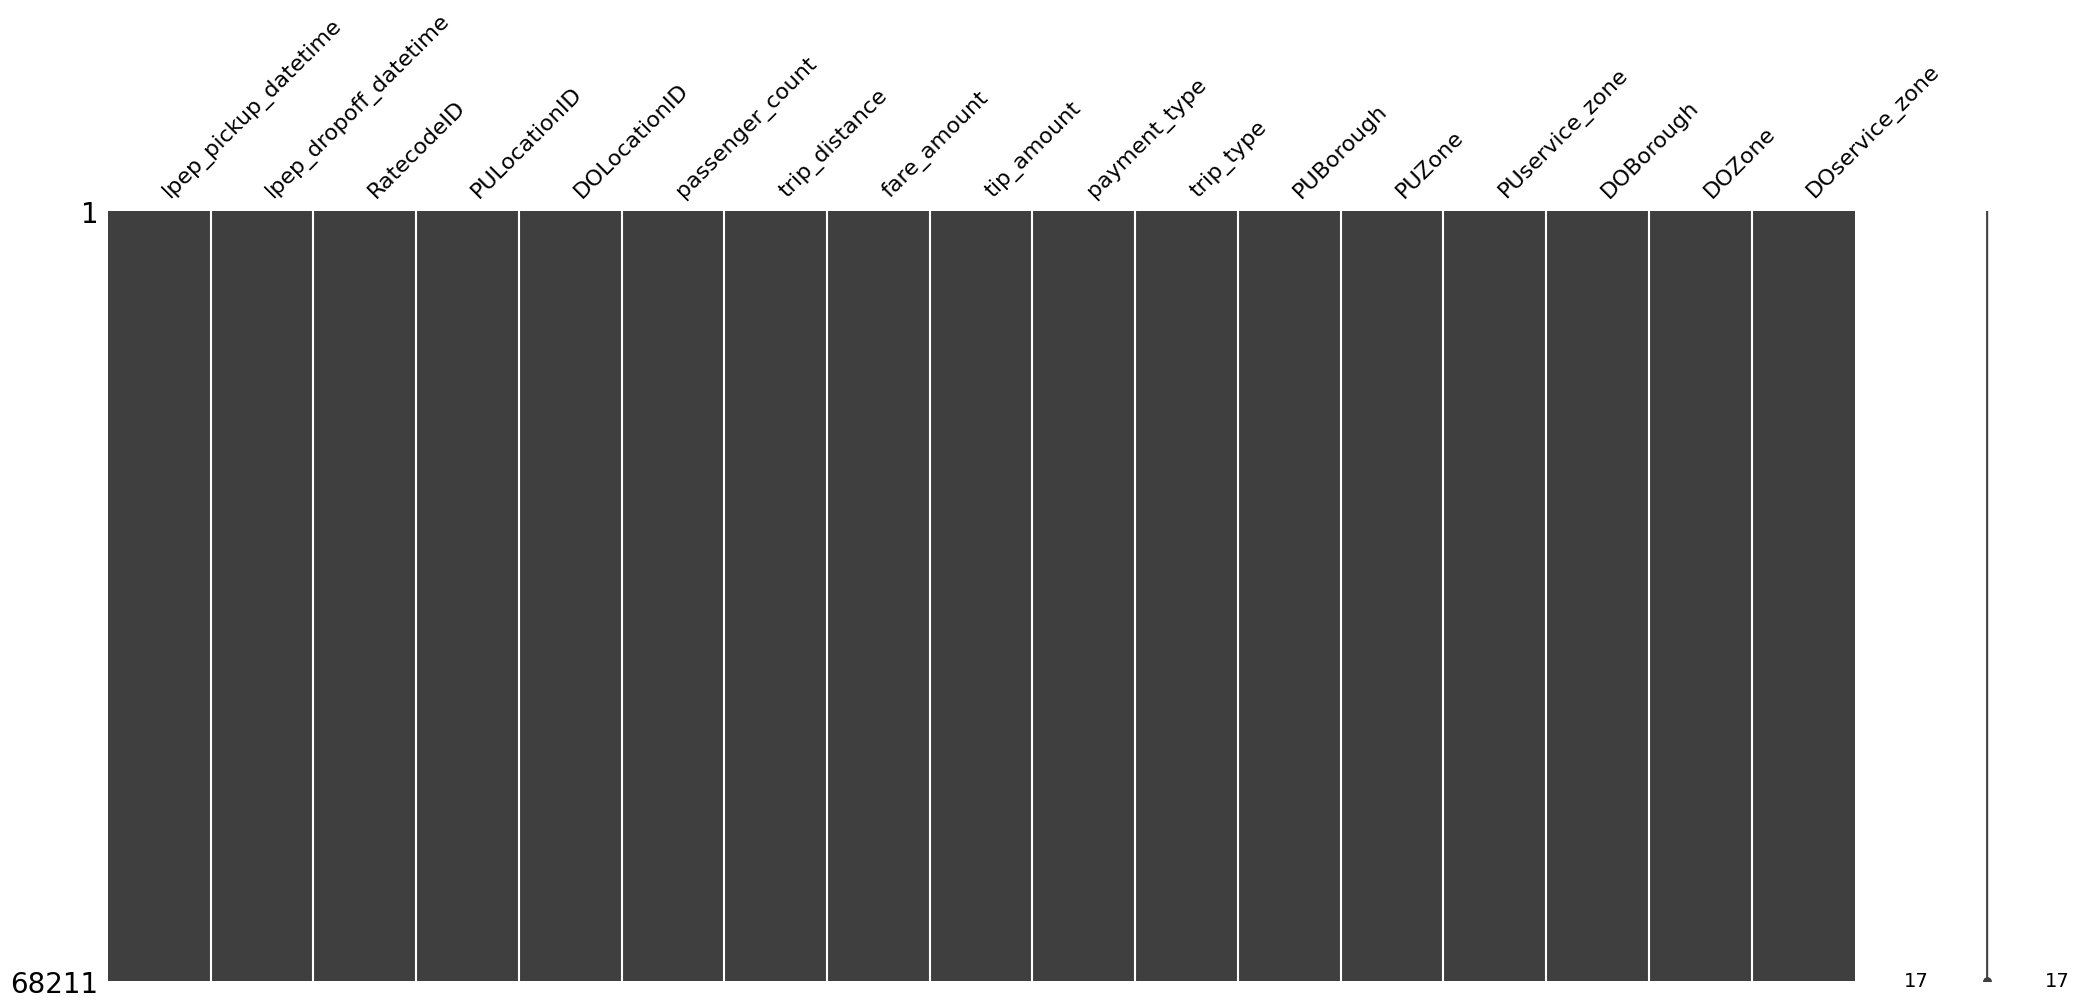

In [29]:
missingno.matrix(combined_data)

## Statistika Deskriptif Variabel Numerik

###Describe

In [30]:
combined_data.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,trip_type
count,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.300773,8.114852,16.603545,2.139012,1.020539
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,0.000000,-70.000000,-10.500000,1.000000
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,1.110000,9.300000,0.000000,1.000000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,1.850000,13.500000,1.600000,1.000000
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,3.210000,19.800000,3.330000,1.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.000000,120098.840000,490.000000,222.220000,2.000000
std,NaN,NaN,0.946489,585.105955,13.470121,3.052710,0.141837


### Histogram

Berdasarkan hasil grafik histogram, data terlihat jomplang

array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'tip_amount'}>]], dtype=object)

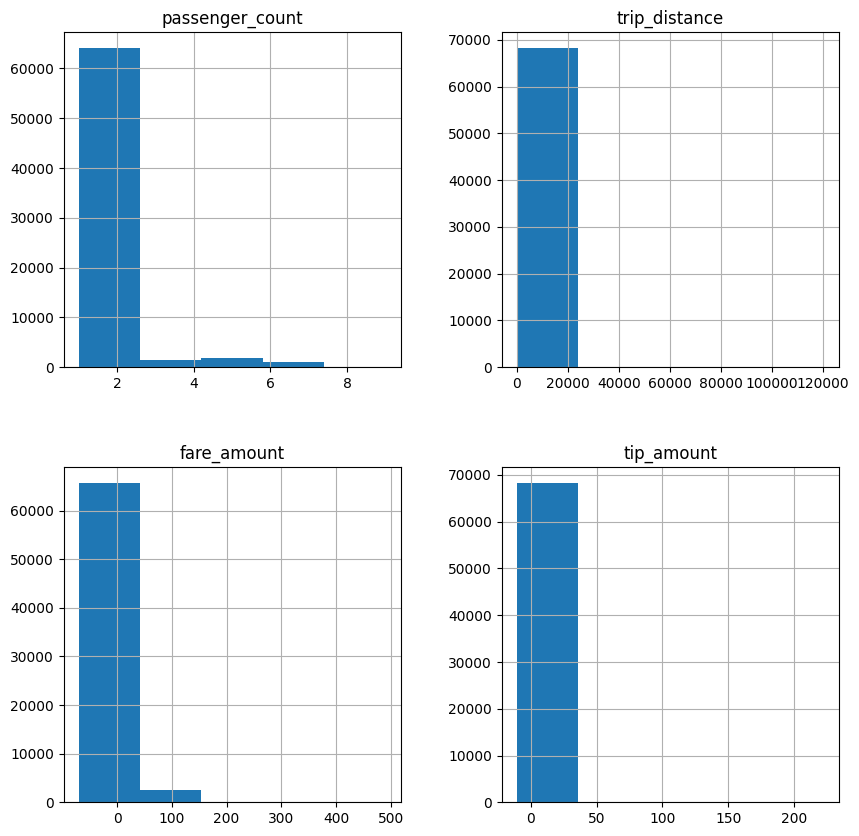

In [31]:
combined_data['trip_type'] = combined_data['trip_type'].astype('object')
combined_data['lpep_pickup_datetime'] = combined_data['lpep_pickup_datetime'].astype('object')
combined_data['lpep_dropoff_datetime'] = combined_data['lpep_dropoff_datetime'].astype('object')
combined_data.hist(bins=5, figsize=(10,10))

### Uji Normalitas

**Karena secara histogram data terlihat jomplang**, diperlukan uji normalitas bagi data Passenger Count, Trip Distance, dan Fare Amount yang merupakan data numerik dengan Uji Kolmogorof Smirnov yang lebih cocok untuk data dengan jumlah yang banyak (n = 68211). Namun kita sajikan Uji Shapiro Wilk sebagai pembanding.

**Berdasarkan kedua uji normalitas, hanya data Passenger count yang menyebar normal**


In [32]:
# Kolmogorov Smirnov
input_column_name = 'passenger_count'
stat, pval = kstest(combined_data[input_column_name], 'norm')

if pval < 0.05:
    print(f"Data {input_column_name} tidak normal (KS Test)")
else:
    print(f"Data {input_column_name} normal (KS Test)")

# Shapiro Wilk
stat, pval = shapiro(combined_data[input_column_name])

if pval < 0.05:
    print(f"Data {input_column_name} tidak normal (SW Test)")
else:
    print(f"Data {input_column_name} normal (SW Test)")


Data passenger_count tidak normal (KS Test)
Data passenger_count tidak normal (SW Test)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68211.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# Kolmogorov Smirnov
input_column_name = 'trip_distance'
stat, pval = kstest(combined_data[input_column_name], 'norm')

if pval < 0.05:
    print(f"Data {input_column_name} tidak normal (KS Test)")
else:
    print(f"Data {input_column_name} normal (KS Test)")

# Shapiro Wilk
stat, pval = shapiro(combined_data[input_column_name])

if pval < 0.05:
    print(f"Data {input_column_name} tidak normal (SW Test)")
else:
    print(f"Data {input_column_name} normal (SW Test)")


Data trip_distance tidak normal (KS Test)
Data trip_distance tidak normal (SW Test)


In [34]:
# Kolmogorov Smirnov
input_column_name = 'fare_amount'
stat, pval = kstest(combined_data[input_column_name], 'norm')

if pval < 0.05:
    print(f"Data {input_column_name} tidak normal (KS Test)")
else:
    print(f"Data {input_column_name} normal (KS Test)")

# Shapiro Wilk
stat, pval = shapiro(combined_data[input_column_name])

if pval < 0.05:
    print(f"Data {input_column_name} tidak normal (SW Test)")
else:
    print(f"Data {input_column_name} normal (SW Test)")


Data fare_amount tidak normal (KS Test)
Data fare_amount tidak normal (SW Test)


### Outliers

Kita lihat outliers secara visual dengan boxplot dan banyaknya outliers dengan Z-Score (Z-Score diatas 2 dianggap outlier).

**Boxplot yang dihasilkan cukup ramping, namun jumlah outlier relatif kecil (dibawah 5% dari keseluruhan data).**

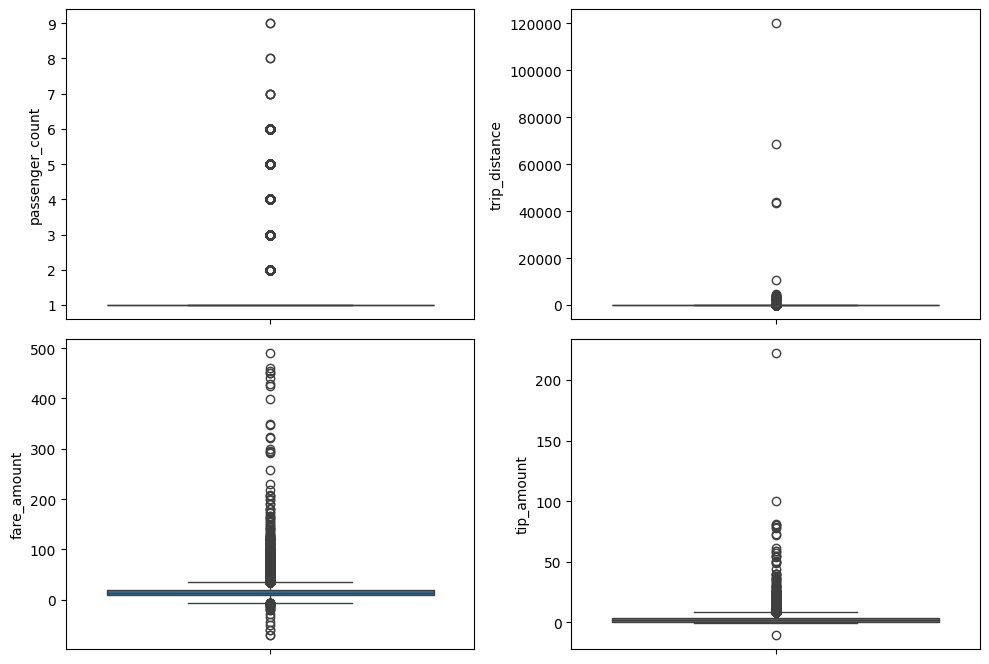

In [35]:
numerik = combined_data.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(3,2,posisi)
    sns.boxplot(combined_data[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [36]:
list_jumlah_outliers = []
list_outliers_pct = []
for setiap_kolom in numerik.columns:
    std = combined_data[setiap_kolom].std()
    mean = combined_data[setiap_kolom].mean()

    zscore = abs((combined_data[setiap_kolom]-mean)/std) # rumus zscore
    jumlah_outliers = len(zscore[zscore>2])
    outliers_pct = jumlah_outliers/len(combined_data)*100
    list_jumlah_outliers.append(jumlah_outliers)
    list_outliers_pct.append(outliers_pct)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers,
                'outliers(%)':  list_outliers_pct
})

,kolom,jumlah outliers,outliers(%)
0,passenger_count,3198,4.688393
1,trip_distance,33,0.048379
2,fare_amount,2397,3.514096
3,tip_amount,2134,3.128528


### Data Correlation Spearman

Berdasarkan uji Spearman, terlihat **hubungan kuat antara Trip Distance dan Fare Amount**. Ini sesuai dengan logika bahwa semakin jauh jarak tempuh, tentu tarif taxi akan semakin mahal.

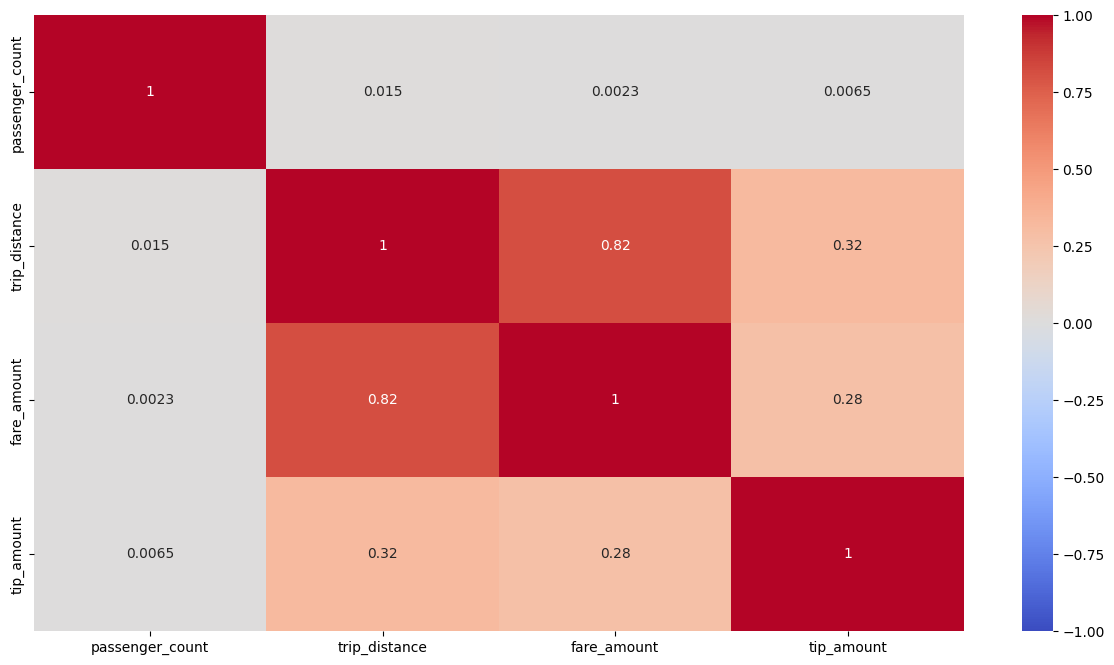

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(numerik.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

##Statistika Deskriptif Variabel Kategorik



###Describe

In [38]:
combined_data['trip_type'] = combined_data['trip_type'].astype('object')
kategorik = combined_data.select_dtypes(include = 'object')
kategorik.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,payment_type,trip_type,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
count,68211,68211,68211.0,68211,68211,68211.0,68211.0,68211,68211,68211,68211,68211,68211
unique,66575,66519,5.0,226,249,5.0,2.0,7,225,5,7,248,5
top,2023-01-09 09:08:00,2023-01-09 00:00:00,1.0,74,75,1.0,1.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone
freq,4,6,66367.0,13257,3524,44527.0,66810.0,39436,13257,64013,39617,3524,43605


###Unique

In [39]:
# menghitung jumlah unique value setiap variabel kategorik
kategorik.nunique()

,0
lpep_pickup_datetime,66575
lpep_dropoff_datetime,66519
RatecodeID,5
PULocationID,226
DOLocationID,249
payment_type,5
trip_type,2
PUBorough,7
PUZone,225
PUservice_zone,5


### Value Counts for Selected Columns

Hanya pilih kolom yang jumlah uniknya sedikit, yakni **RatecodeID, payment_type, trip_type, PUBorough, PUservice_zone, DOBorough, dan DOservice_zone**

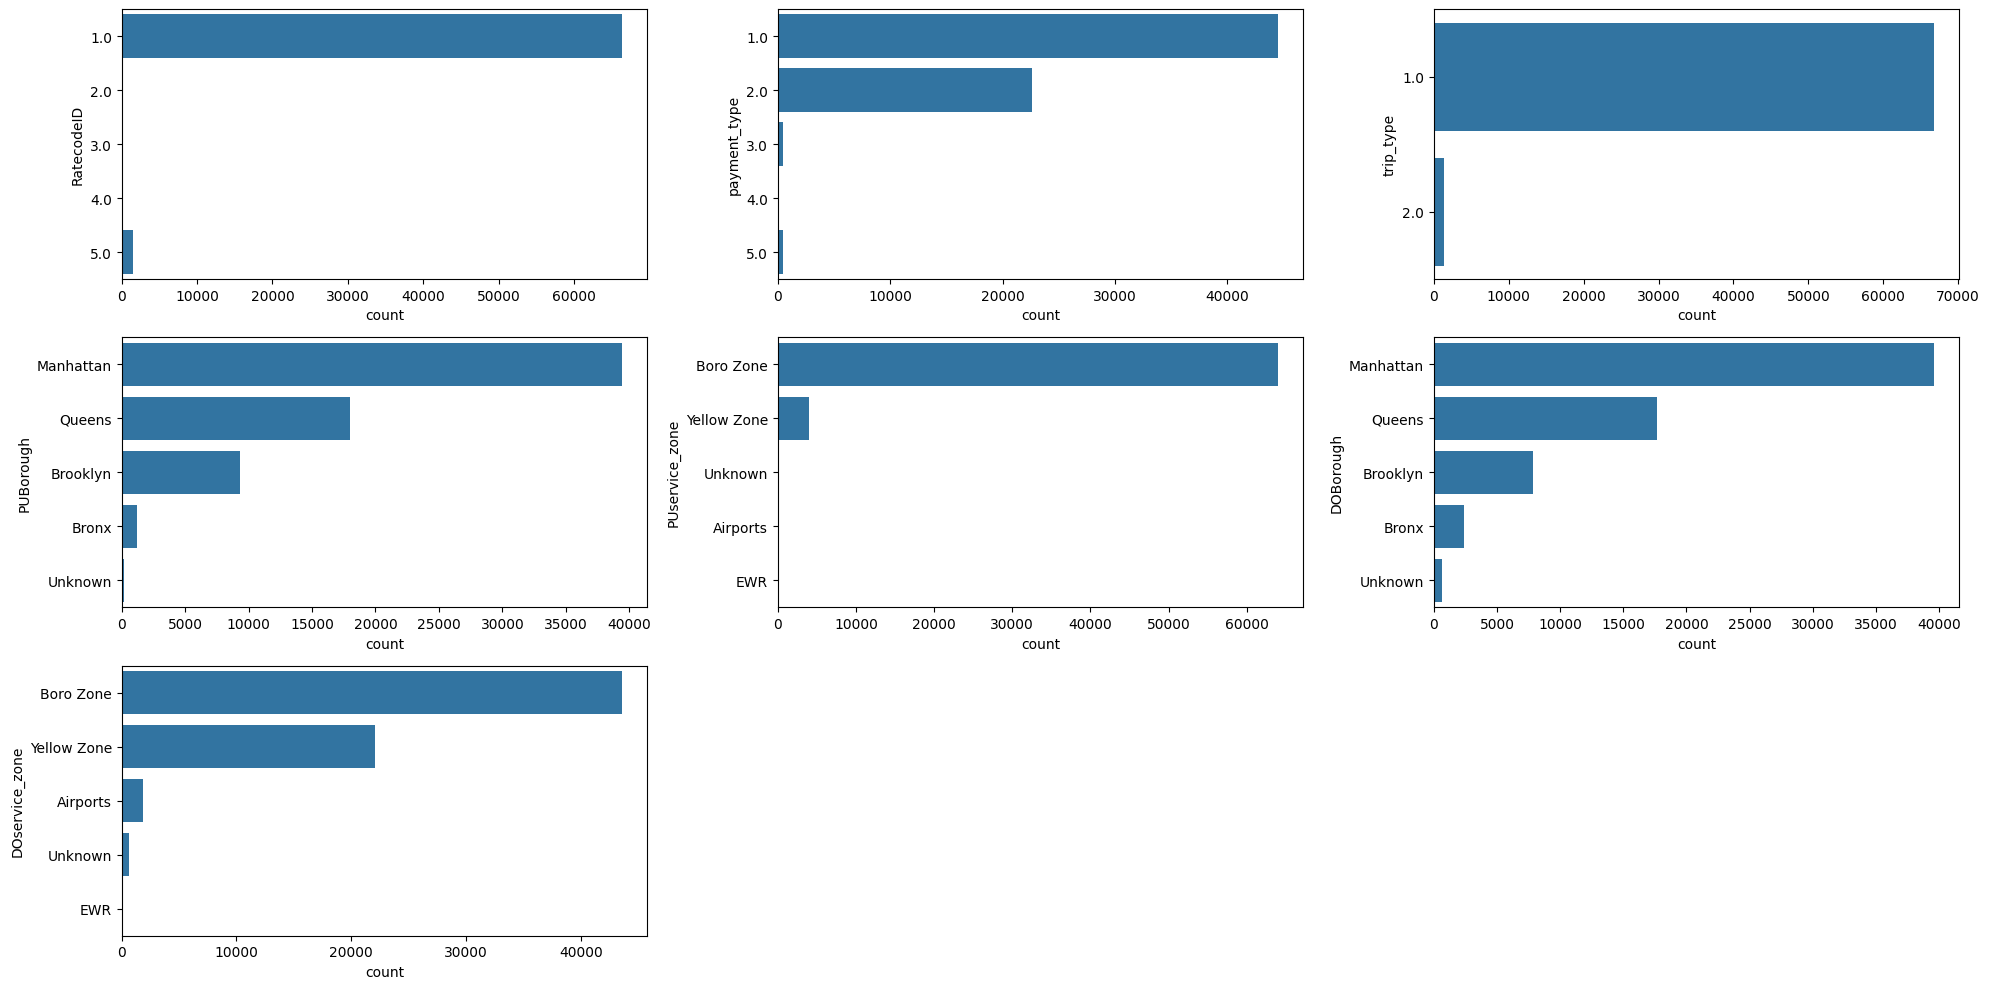

In [40]:
kategorik_selected = kategorik[["RatecodeID", "payment_type", "trip_type", "PUBorough", "PUservice_zone", "DOBorough", "DOservice_zone"]]
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (20,10)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik_selected.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(3,3,posisi)
    sns.barplot(kategorik_selected[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

###Date time

In [41]:
combined_data['lpep_pickup_datetime'] = pd.to_datetime(combined_data['lpep_pickup_datetime'])
combined_data['lpep_dropoff_datetime'] = pd.to_datetime(combined_data['lpep_dropoff_datetime'])
combined_data[['lpep_pickup_datetime', 'lpep_pickup_datetime']].describe()

,lpep_pickup_datetime,lpep_pickup_datetime
count,68211,68211
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:10:55.679524096
min,2009-01-01 20:21:27,2009-01-01 20:21:27
25%,2023-01-09 11:59:47.500000,2023-01-09 11:59:47.500000
50%,2023-01-17 08:40:42,2023-01-17 08:40:42
75%,2023-01-24 15:52:30,2023-01-24 15:52:30
max,2023-02-01 03:10:05,2023-02-01 03:10:05


## Outlier Treatment

###Date time

Kita hanya menggunakan data yang ada di tahun 2023. Sehingga data dengan tahun 2009 adalah outlier.

In [42]:
outliers = combined_data[(combined_data['lpep_pickup_datetime'].dt.year!=2023)]
combined_data.drop(outliers.index, inplace=True)

In [43]:
combined_data[['lpep_pickup_datetime', 'lpep_pickup_datetime']].describe()

,lpep_pickup_datetime,lpep_pickup_datetime
count,68208,68208
mean,2023-01-16 22:00:48.241819136,2023-01-16 22:00:48.241819136
min,2023-01-01 00:01:31,2023-01-01 00:01:31
25%,2023-01-09 12:00:37.500000,2023-01-09 12:00:37.500000
50%,2023-01-17 08:41:26,2023-01-17 08:41:26
75%,2023-01-24 15:52:46.500000,2023-01-24 15:52:46.500000
max,2023-02-01 03:10:05,2023-02-01 03:10:05


###Passenger Count

Kelompokkan data dengan jumlah dibawah 500 menjadi 1 kategori, diatas 3

In [44]:
combined_data['passenger_count'] = combined_data['passenger_count'].apply(lambda x: 'more than 3' if x>3 else str(x))

In [45]:
combined_data['passenger_count'].value_counts().sort_index()

,count
passenger_count,
1.0,58956
2.0,5096
3.0,958
more than 3,3198


###Trip Distance
Asumsikan outlier diatas 20 miles, mengingat Q3 data ini masih 3 miles. Kita gunakan tendensi sentral mean dari data keseluruhan.

In [46]:
mean_trip_dist = combined_data['trip_distance'].mean()

In [47]:
combined_data['trip_distance'] = combined_data['trip_distance'].apply(lambda x: mean_trip_dist if x>20 else x)

In [48]:
combined_data['trip_distance'].describe()

,trip_distance
count,68208.000000
mean,2.636257
std,2.573558
min,0.000000
25%,1.110000
50%,1.850000
75%,3.210000
max,20.000000


In [49]:
#Binning
bins_of_distance = [0, 3, 6, 9, np.inf]
labels_of_distance = ['<3 miles', '4-6 miles', '7-9 miles', '>9 miles']

combined_data['distance_bins'] = pd.cut(combined_data['trip_distance'], bins=bins_of_distance, labels=labels_of_distance)

###Fare Amount
Hasil analisis menunjukkan ada fare yang negatif dan nilainya terlalu besar (outlier). Berdasarkan analisis, nilai fare akan dibatasi dalam range (0-100). Kedepannya, dapat dilakukan model regresi untuk menentukan fare berdasarkan variabel2 yang ada dalam data.

Kita lakukan binning juga untuk mengkategorikan data fare amount menjadi beberapa kelompok.

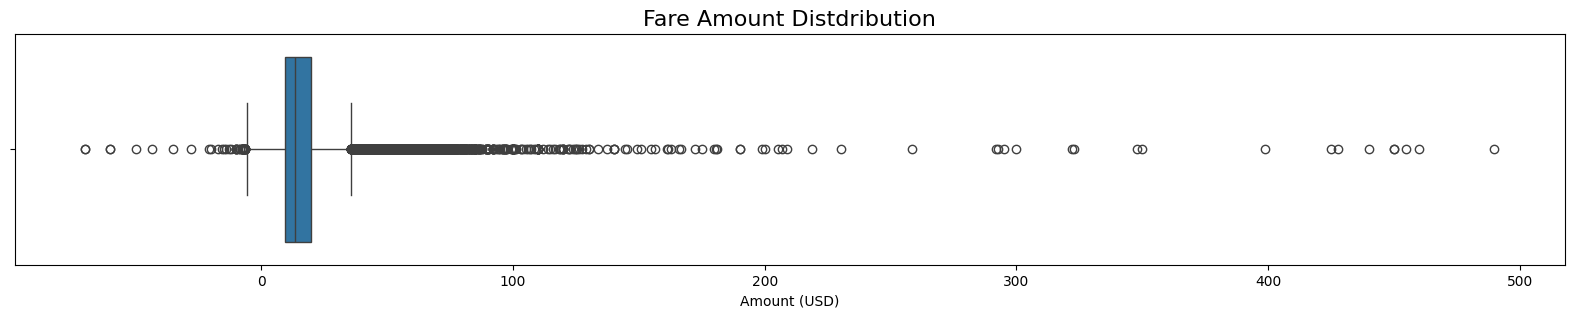

In [50]:
plt.figure(figsize=(20, 3))
sns.boxplot(data=combined_data, x='fare_amount')
plt.xlabel('Amount (USD)')
plt.title('Fare Amount Distdribution', fontsize=16)

plt.show()

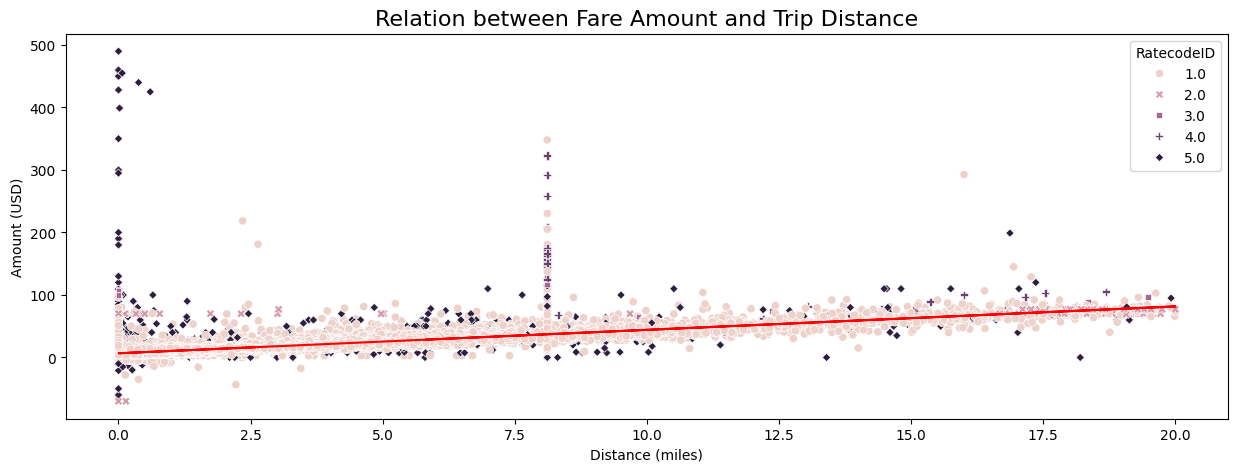

In [51]:
plt.figure(figsize=(15, 5))

sns.scatterplot(combined_data, x='trip_distance', y='fare_amount',  hue='RatecodeID', style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = combined_data['trip_distance'], combined_data['fare_amount']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

In [52]:
combined_data['fare_amount'] = combined_data['fare_amount'].apply(lambda x: 0 if x<0 else x)
combined_data['fare_amount'] = combined_data['fare_amount'].apply(lambda x: 100 if x>100 else x)

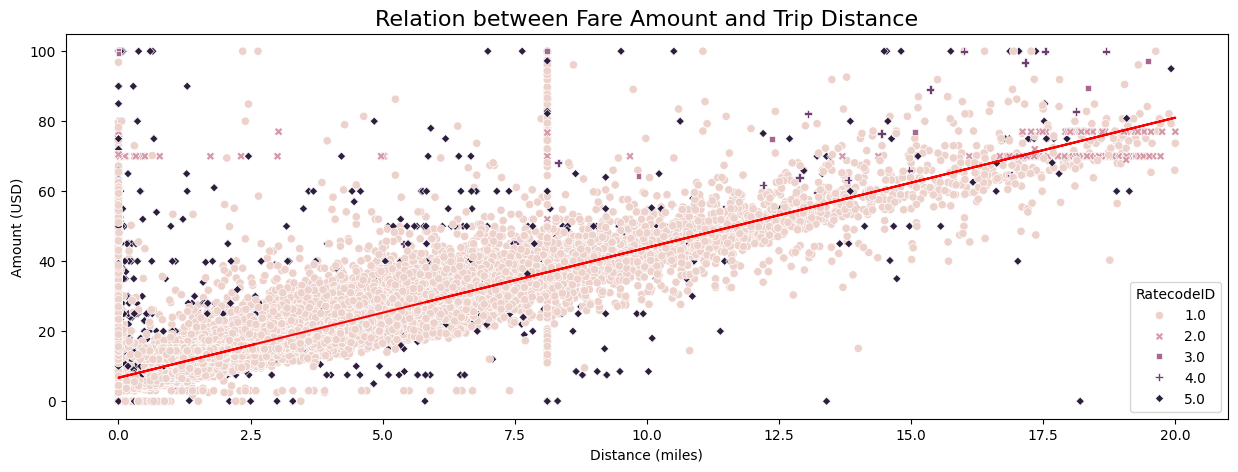

In [53]:
plt.figure(figsize=(15, 5))

sns.scatterplot(combined_data, x='trip_distance', y='fare_amount',  hue='RatecodeID', style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = combined_data['trip_distance'], combined_data['fare_amount']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

In [54]:
#Binning
bins_fare = [-np.inf, 20, 40, 60, 80, np.inf]
labels_fare = ['$<20', '$21-40', '$41-60', '$61-80', '>$80']
combined_data['fare_amount_bins'] = pd.cut(combined_data['fare_amount'], bins=bins_fare, labels=labels_fare)

##Fitur Baru

###Pickup Time Binning

In [55]:
time_bins = [0, 5, 11, 15, 20, 24]
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
combined_data['pickup_time'] = pd.cut(combined_data['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

###Category Weekdays or Weekend

In [56]:
combined_data['day_category'] = combined_data['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

#Cleaned Data

In [57]:
listItem = []
for col in combined_data.columns :
    listItem.append([col, combined_data[col].dtype, combined_data[col].isna().sum(),
                    combined_data[col].nunique(), list(combined_data[col].drop_duplicates().sample(2).values)]);

combined_dataDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(combined_data.shape)
combined_dataDesc

(68208, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,lpep_pickup_datetime,datetime64[ns],0,66572,"[2023-01-20T19:20:20.000000000, 2023-01-26T06:..."
1,lpep_dropoff_datetime,datetime64[ns],0,66516,"[2023-01-12T10:59:17.000000000, 2023-01-18T09:..."
2,RatecodeID,object,0,5,"[5.0, 3.0]"
3,PULocationID,object,0,226,"[139, 52]"
4,DOLocationID,object,0,249,"[57, 47]"
5,passenger_count,object,0,4,"[1.0, 2.0]"
6,trip_distance,float64,0,1715,"[16.09, 2.42]"
7,fare_amount,float64,0,2446,"[40.28, 36.38]"
8,tip_amount,float64,0,1492,"[6.86, 80.0]"
9,payment_type,object,0,5,"[1.0, 4.0]"


#Data Analysis

###Categorical

In [58]:
pd.set_option("display.max_columns", 30)
color = sns.color_palette("Paired")
scale = 'coolwarm_r'

In [59]:
kategorik = combined_data.select_dtypes(include = 'object')
#drop column from kategorik if nunique is more than 10

for col in kategorik.columns:
  if kategorik[col].nunique() > 10:
    kategorik.drop(col, axis=1, inplace=True)
kategorik.describe()


,RatecodeID,passenger_count,payment_type,trip_type,PUBorough,PUservice_zone,DOBorough,DOservice_zone,day_category
count,68208.0,68208,68208.0,68208.0,68208,68208,68208,68208,68208
unique,5.0,4,5.0,2.0,7,5,7,5,2
top,1.0,1.0,1.0,1.0,Manhattan,Boro Zone,Manhattan,Boro Zone,Weekdays
freq,66364.0,58956,44526.0,66807.0,39436,64010,39616,43603,51341


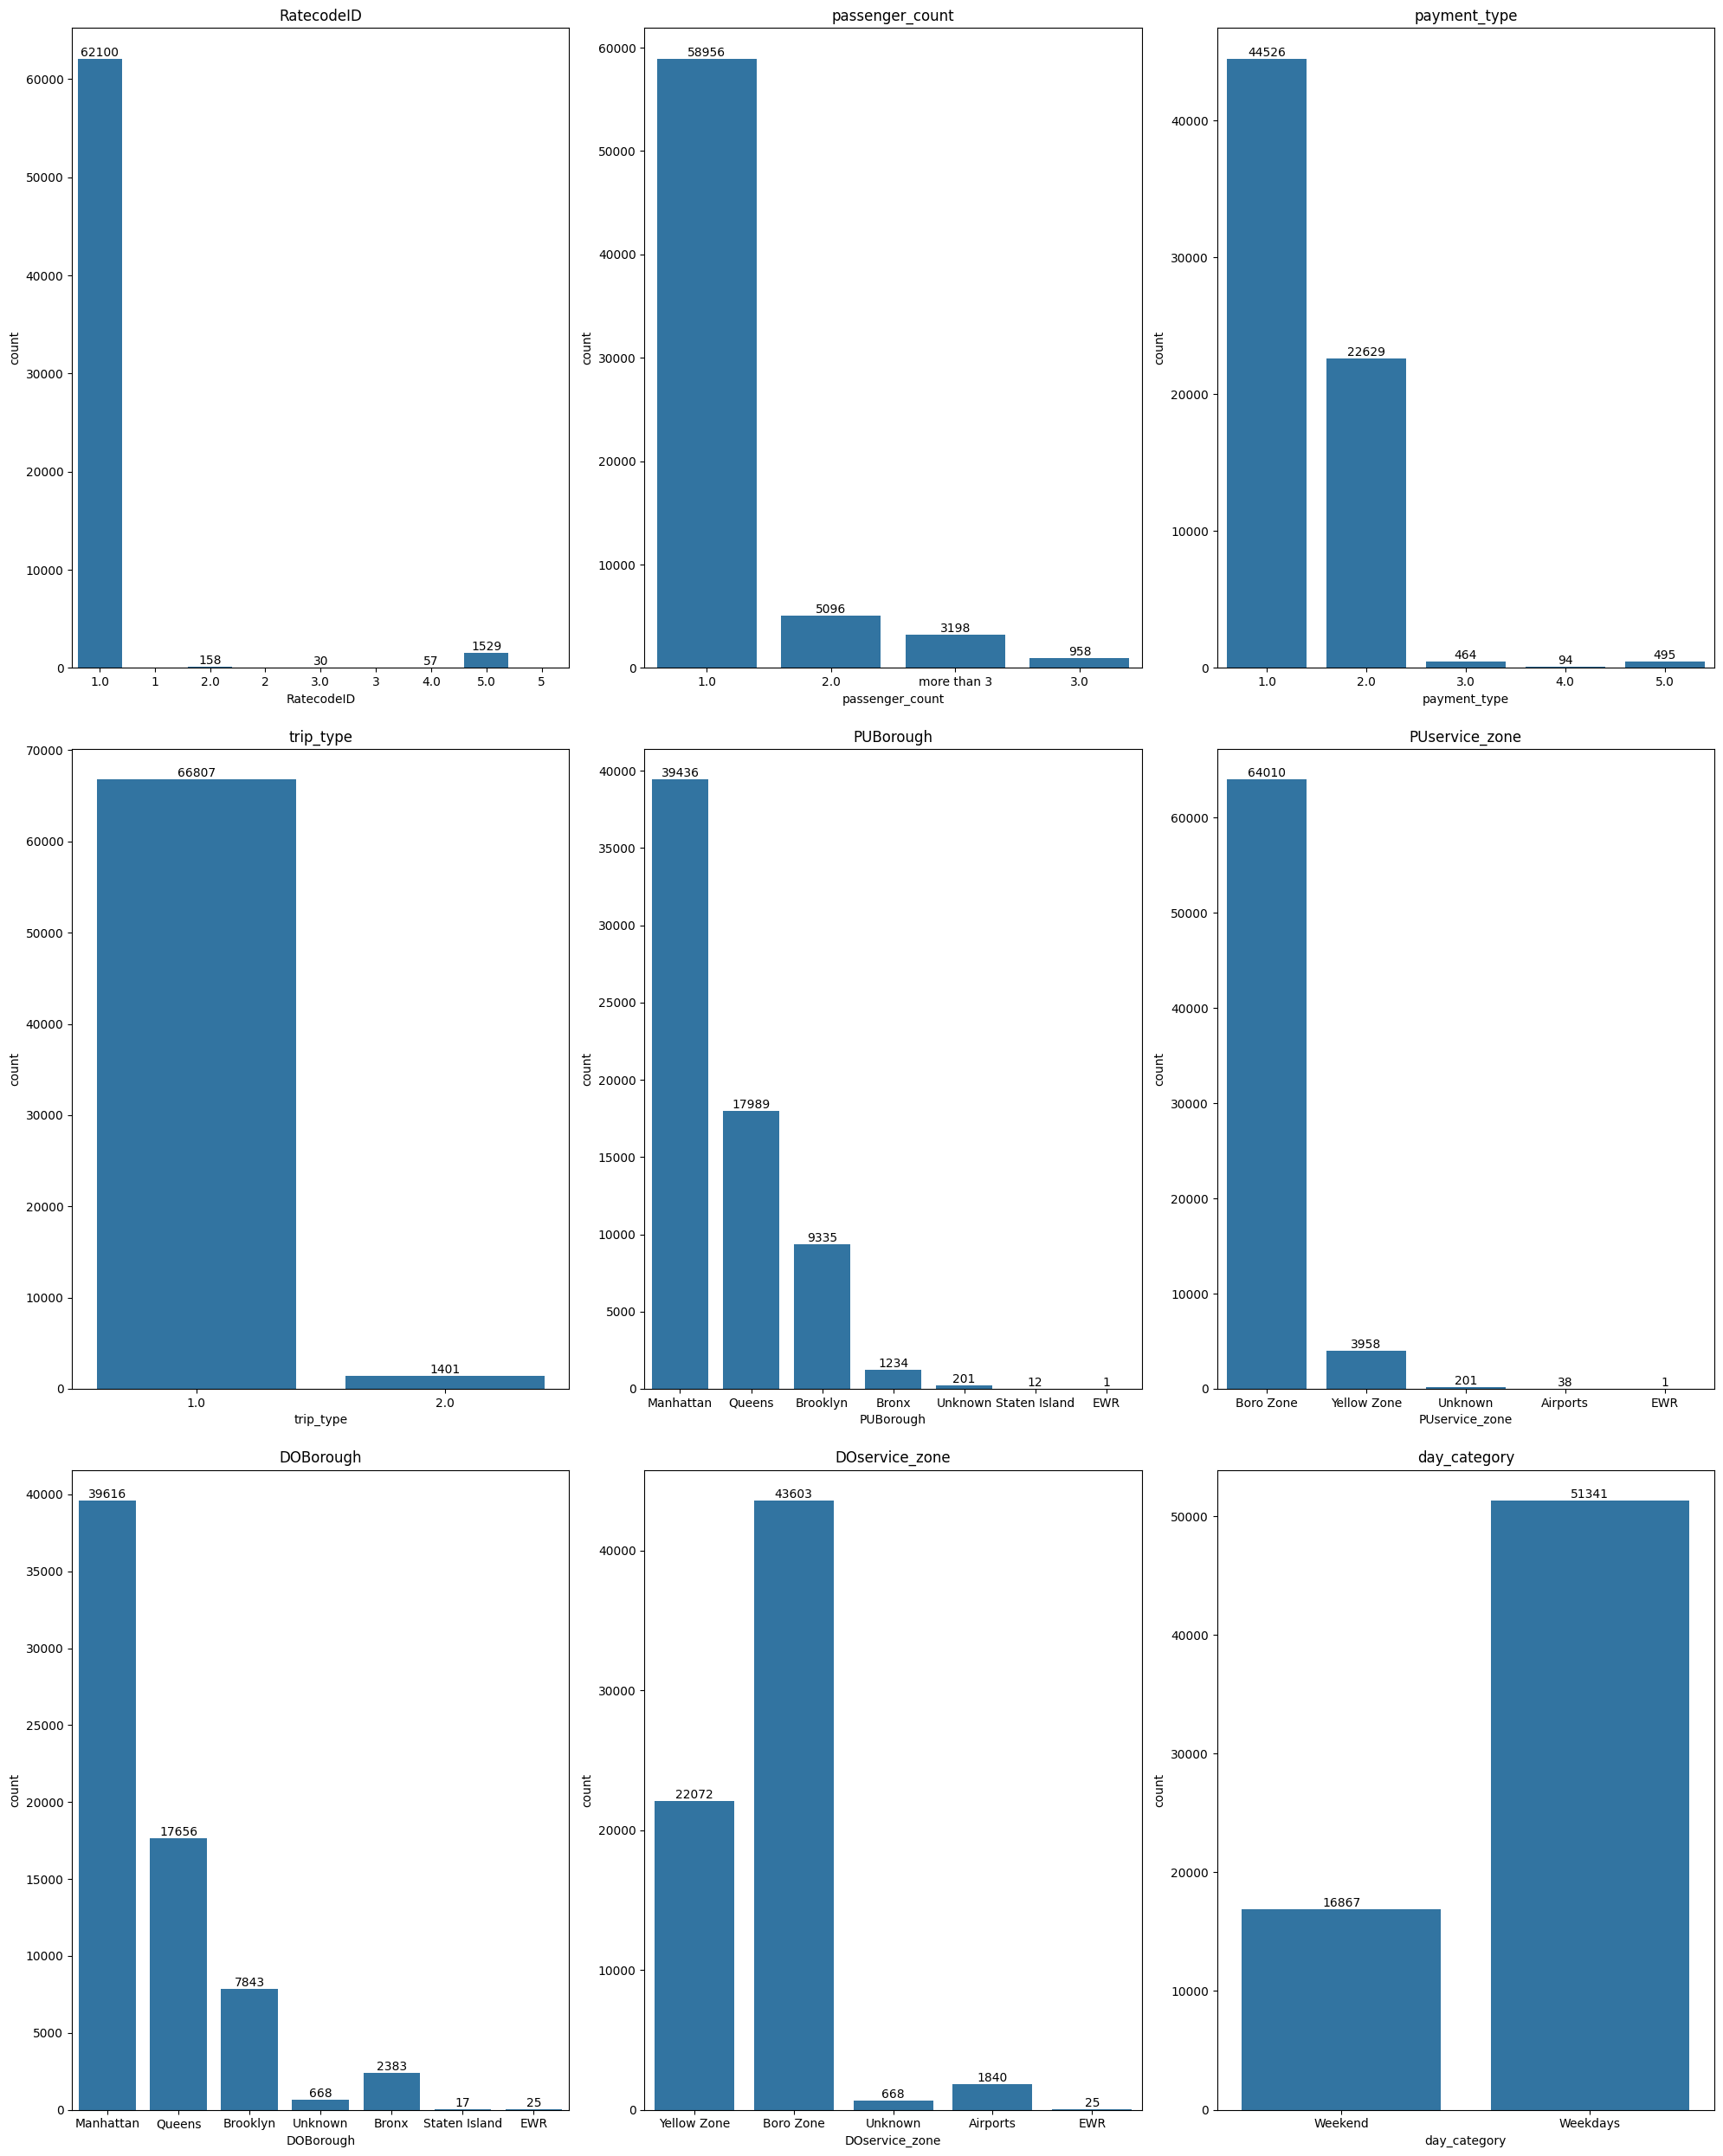

In [60]:
cols = list(kategorik)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 25))
axs = axs.flatten()

for i, col in enumerate(cols):
    bars = sns.countplot(data=kategorik, x=col, ax=axs[i])
    axs[i].set_title(col)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axs[i].text(x_value, y_value, label, ha='center', va='bottom')

plt.tight_layout(w_pad=1, h_pad=2)
plt.show()

###Numerical

Terlihat data memiliki distribusi right skew atau positif skew.

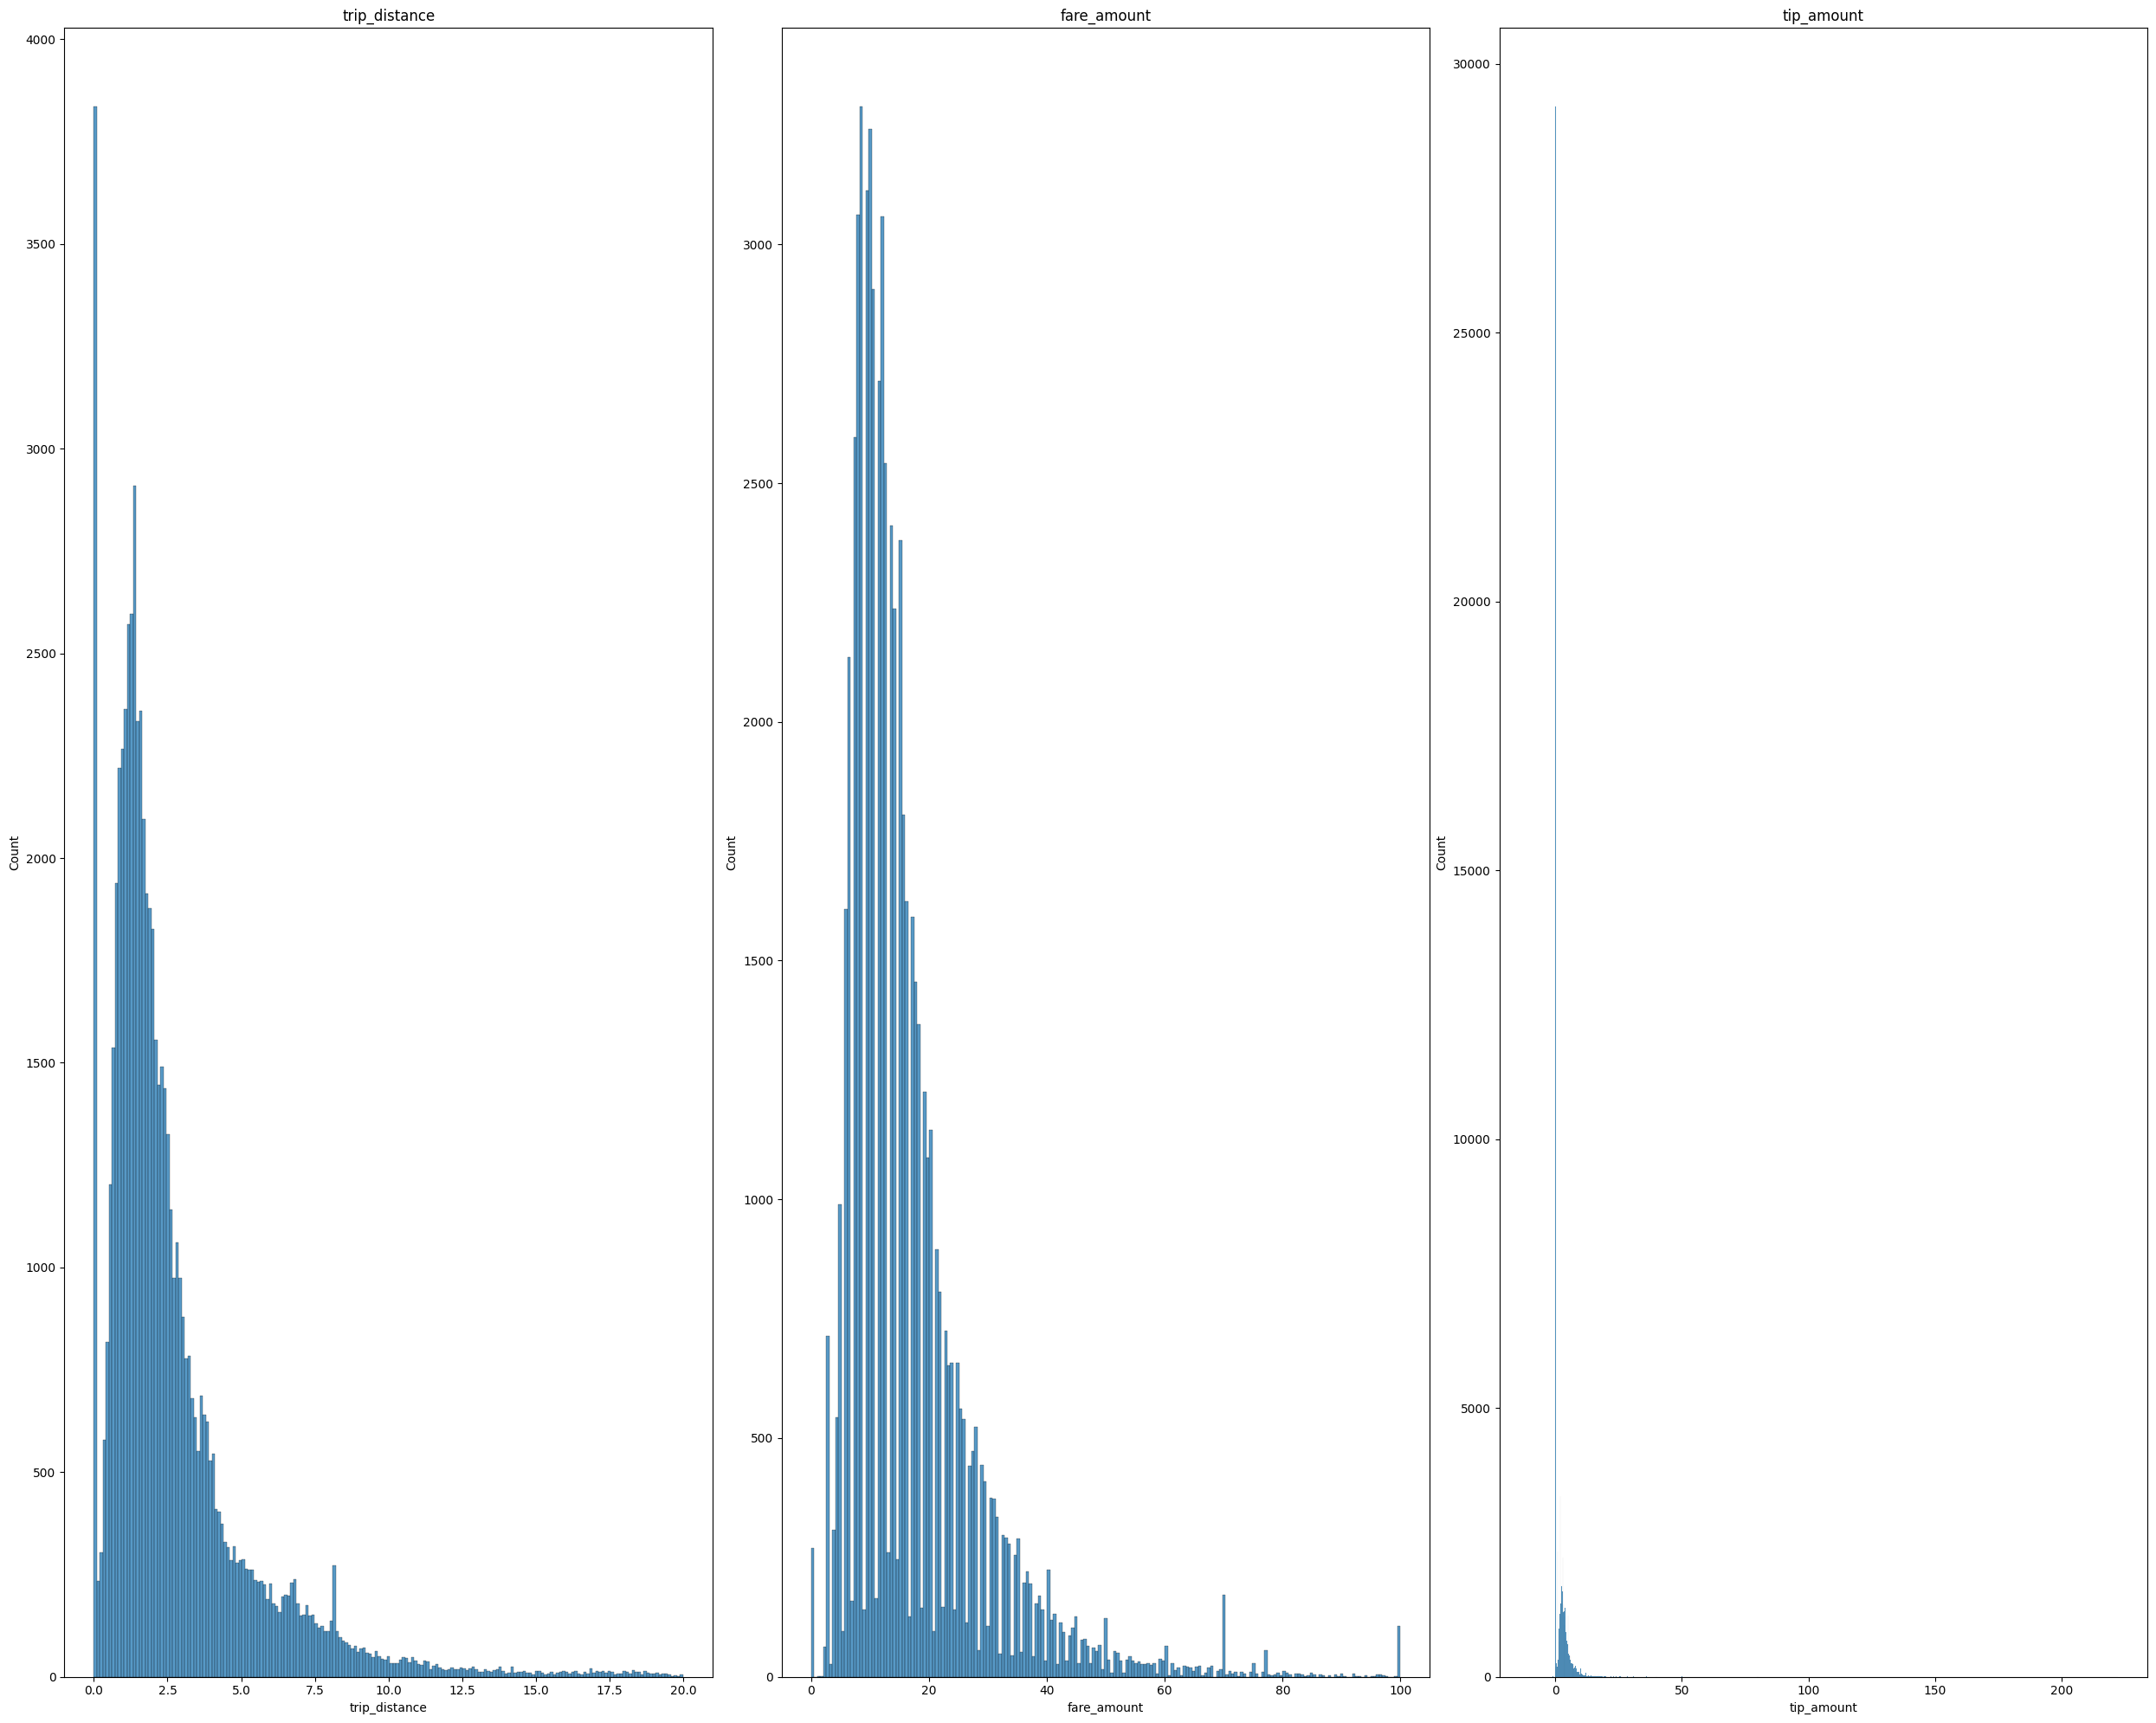

In [61]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(25,20))
index = 0
axs = axs.flatten()
for k, v in combined_data.select_dtypes(include=[np.number]).items():
    axs[index].set_title(k)
    sns.histplot(x=combined_data[k], ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

###Trip Distribution



In [62]:
trip_monthly = combined_data.groupby(combined_data['lpep_pickup_datetime'].dt.date, observed=False).agg(trip_bydate=('lpep_pickup_datetime', 'count')).reset_index()
trip_monthly['lpep_pickup_datetime'] = pd.to_datetime(trip_monthly['lpep_pickup_datetime'])
trip_monthly['day_of_week'] = trip_monthly['lpep_pickup_datetime'].dt.day_name()

trip_daily = trip_monthly.groupby('day_of_week', observed=False).agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_daily['day_cat']= trip_daily['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')
trip_daily_cat = trip_daily.groupby('day_cat', observed=False).agg(trip_bycat=('trip_byday', 'sum')).reset_index()

trip_hourly = combined_data.groupby([combined_data['lpep_pickup_datetime'].dt.hour, 'pickup_time'], observed=False).agg(trip_byhour=('lpep_pickup_datetime', 'count')).reset_index()
trip_bytimecat = combined_data.groupby('pickup_time', observed=False).agg(trip_bytime=('pickup_time', 'count')).reset_index()

trip_merge = pd.merge(trip_monthly, trip_daily, on='day_of_week', how='left')
trip_merge = pd.merge(trip_merge, trip_daily_cat, on='day_cat', how='left')
trip_time_merge = pd.merge(trip_hourly, trip_bytimecat, on='pickup_time', how='left')





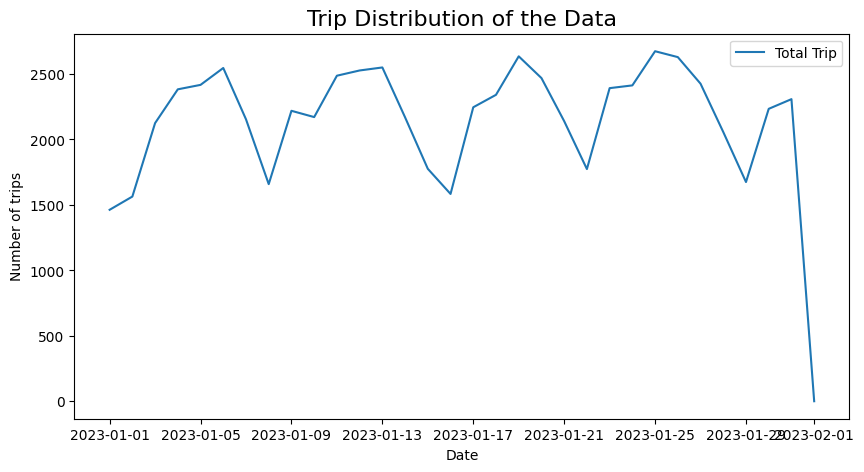

In [63]:
plt.figure(figsize=(10,5))
sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime',
             y='trip_bydate',
             label = 'Total Trip')

plt.title('Trip Distribution of the Data', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')

plt.show()

We get:
1. Terlihat adanya sebuah time series dengan pattern seasonal (weekly pattern) dengan sedikit trend menaik.
2. Jumlah perjalanan taksi tertinggi ada pada 25 Januari 2023.
3. Jumlah perjalanan taksi terendah ada pada  01 Januari 2023.
4. Data terpotong pada awal Februari 2023, sehingga grafik terlihat kurang rapi.

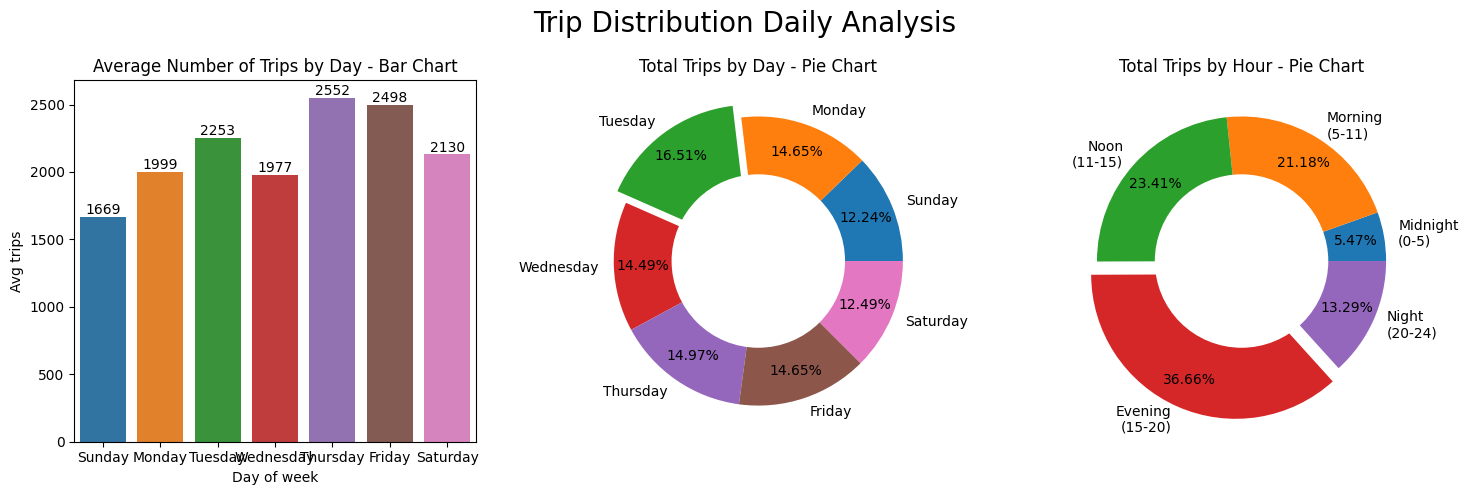

In [64]:
plt.figure(figsize=(15,5))

plt.suptitle('Trip Distribution Daily Analysis', fontsize=20)
plt.subplot(1,3,1)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(),
                   y=trip_merge['avg_trip'].unique().tolist(),
                   hue = trip_merge['day_of_week'].unique().tolist())
for col, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 20
    label = "{:.0f}".format(trip_merge['avg_trip'].iloc[col])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Average Number of Trips by Day - Bar Chart')
plt.xlabel('Day of week')
plt.ylabel('Avg trips')
plt.yticks(np.arange(0, 3000, 500))

plt.subplot(1,3,2)
plt.pie(x=trip_merge['trip_byday'].unique().tolist(),
        labels=trip_merge['day_of_week'].unique().tolist(),
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0,0,0.1,0,0,0,0),
        colors=sns.color_palette())
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0, 0, "", ha='center', va='center')
plt.title('Total Trips by Day - Pie Chart')

labels = [f"{trip_time_merge['pickup_time'].unique().tolist()[0]}\n(0-5)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[1]}\n(5-11)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[2]}\n(11-15)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[3]}\n(15-20)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[4]}\n(20-24)"]

plt.subplot(1,3,3)
plt.pie(x=trip_time_merge['trip_bytime'].unique().tolist(),
        labels=labels,
        pctdistance=0.8,
        autopct='%1.2f%%',
        explode=(0,0,0,0.1,0),
        colors=sns.color_palette())

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0, 0, "", ha='center', va='center')
plt.title('Total Trips by Hour - Pie Chart')

plt.tight_layout()
plt.show()

We get:
1. Rata-rata banyaknya perjalanan dalam suatu hari paling tinggi terjadi pada hari kamis, mencapai 2552 perjalanan perhari.
2. Persentase tertinggi banyak perjalanan dalam data ada di hari Selasa/Tuesday sebesar 16.51%.
3. Ketika memasuki hari weekend, terjadi penurunan penggunaan taxi.
4. Sore/Evening digemari penumpang untuk naik taxi sebesar 36.66% dari banyak perjalanan.
5. Orang-orang paling jarang naik taxi di tengah malam, hanya 5.47% dari perjalanan.

In [65]:
agg_borough = combined_data.groupby('PUBorough').agg(count=('PUBorough', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_zone = combined_data.groupby('PUZone').agg(count=('PUZone', 'count')).sort_values(by='count', ascending=False).reset_index()

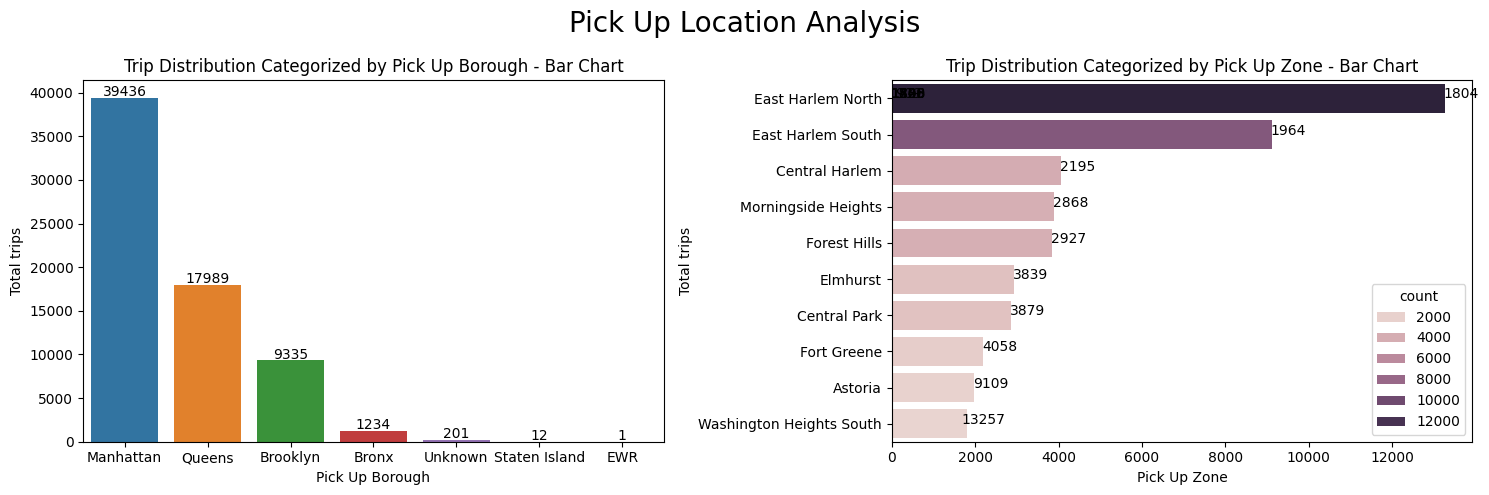

In [66]:
plt.figure(figsize=(15,5))

plt.suptitle('Pick Up Location Analysis', fontsize=20)
plt.subplot(1,2,1)
bars = sns.barplot(x=agg_borough['PUBorough'],
                   y=agg_borough['count'],
                   hue=agg_borough['PUBorough'])
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(agg_borough['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution Categorized by Pick Up Borough - Bar Chart')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=agg_zone.head(10),
                   y='PUZone',
                   x='count',
                   hue = 'count')
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y() + bar.get_height() / 2
    x_value = bar.get_width() + 400
    label = "{:.0f}".format(agg_zone['count'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center')

plt.title('Trip Distribution Categorized by Pick Up Zone - Bar Chart')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total trips')

plt.tight_layout()
plt.show()

We get:
1. Taxi paling dicari di Wilayah Manhattan, lalu diikuti Queens.
2. Top 10 Zona pencari taxi terlihat pada grafik.


###Customer Behaviour

In [67]:
agg_payment = combined_data.groupby('payment_type').agg(count=('payment_type', 'count')).sort_values(by='count', ascending=False).reset_index()
agg_payment['payment_type'] = agg_payment['payment_type'].apply(lambda x: 'Credit card' if x == 1 else "Cash" if x == 2 else 'Other')
agg_payment = agg_payment.groupby('payment_type').agg(count=('count', 'sum')).sort_values(by='count', ascending=False).reset_index()

agg_distance = combined_data.groupby('distance_bins',observed=False).agg(count=('distance_bins', 'count'), median=('trip_distance', 'median')).sort_values(by='count', ascending=False).reset_index()

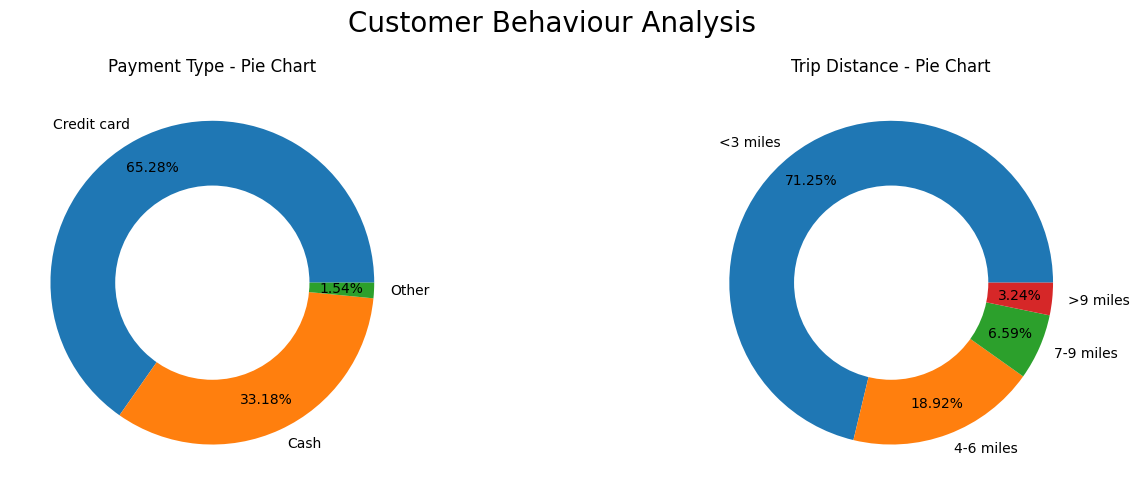

In [68]:
plt.figure(figsize=(15,5))

plt.suptitle('Customer Behaviour Analysis', fontsize=20)
plt.subplot(1,2,1)
plt.pie(x=agg_payment['count'],
        labels=agg_payment['payment_type'],
        pctdistance=0.8,
        autopct='%1.2f%%')

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Payment Type - Pie Chart')
plt.text(0, 0, "", ha='center', va='center', fontsize=20)

plt.subplot(1,2,2)
plt.pie(x=agg_distance['count'].unique().tolist(),
        labels=agg_distance['distance_bins'],
        pctdistance=0.8,
        autopct='%1.2f%%')

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Trip Distance - Pie Chart')
plt.text(0, 0, "", ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.show()

We get:
1. Credit card dan cash paling sering digunakan pelanggan dalam membayar.
2. Pelanggan kebanyakan menempuh jarak kurang dari 3 mil menggunakan taxi.

###Fare Amount

In [69]:
sort_time = ['Morning', 'Noon', 'Evening', 'Night', 'Midnight']
amount_by_time = combined_data.groupby('pickup_time', observed=False).agg(total_fare_amount=('fare_amount', 'sum'),
                                               avg_fare_amount=('fare_amount', 'mean'),
                                               median_fare_amount=('fare_amount', 'median')).reindex(sort_time).reset_index().round(2)

borough_amount_stack = combined_data.pivot_table(index='DOBorough', columns='pickup_time', values='fare_amount', aggfunc='median').fillna(0)
borough_amount_stack = borough_amount_stack[['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']]
borough_tip = combined_data.groupby(['PUBorough', 'pickup_time'], observed=False).agg(median_tip=('tip_amount', 'median')).sort_values(by='median_tip', ascending=False).reset_index().round(2)


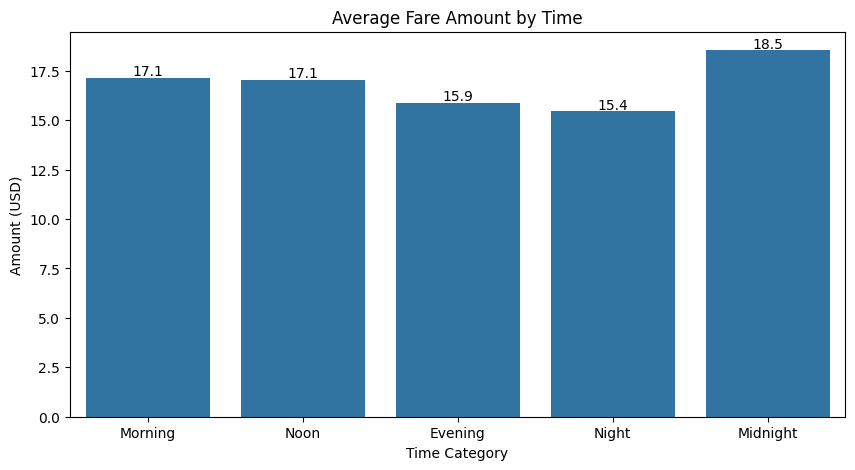

In [70]:
plt.figure(figsize=(10,5))
bars = sns.barplot(data=amount_by_time,
                   x='pickup_time',
                   y='avg_fare_amount')
plt.title('Average Fare Amount by Time')
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.3
    label = "{:.1f}".format(amount_by_time['avg_fare_amount'].iloc[idx])
    plt.text(x_value, y_value, label, ha='center', va='center')
plt.xlabel('Time Category')
plt.ylabel('Amount (USD)')


plt.show()


We get:
1. Credit card dan cash paling sering digunakan pelanggan dalam membayar.
2. Pelanggan kebanyakan menempuh jarak kurang dari 3 mil menggunakan taxi.

- Harga rata-rata dalam sekali perjalanan di tengah malam yaitu pukul 00:00 - 05:00 relatif lebih mahal di bandingnya yang lainnya yaitu 19 USD.

- Harga rata-rata dalam sekali perjalanan terendah yaitu di malam hari pada pukul 20:00 - 00.00 dengan fare amount rata-rata 15 USD.

- Sementara di waktu yang lainnya seperti pagi, siang, dan sore relatif sama.


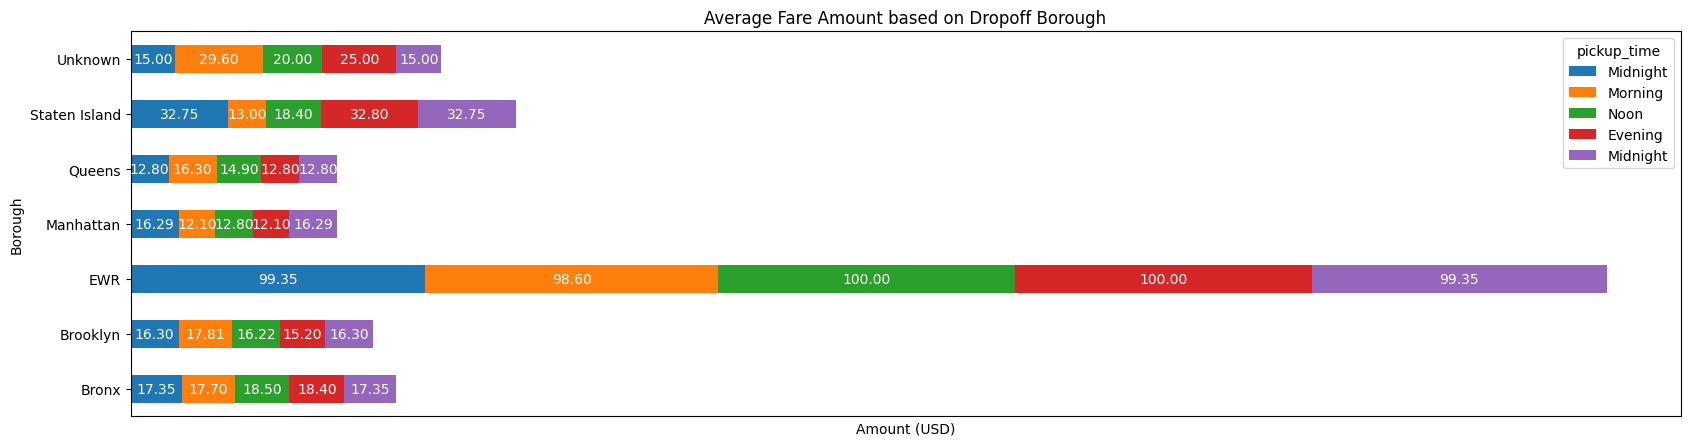

In [72]:
ax = borough_amount_stack.plot(kind='barh', stacked=True, figsize=(20,5))
plt.title('Average Fare Amount based on Dropoff Borough')
plt.xlabel('Amount (USD)')
plt.ylabel('Borough')
plt.xticks([])
for idx, rect in enumerate(ax.patches):
    width = rect.get_width()
    if width > 0:
        y = rect.get_y() + rect.get_height() / 2
        cum_width_prev_segments = sum(borough_amount_stack.iloc[idx % len(borough_amount_stack), :idx // len(borough_amount_stack)])
        x = cum_width_prev_segments + width / 2
        plt.text(x, y, f"{width:.2f}", ha='center', va='center', color='white', fontsize=10)

plt.show()

We get:
1. Rata-rata fare amount dalam sekali perjalanan di wilayah EWR (hanya malam hari) paling mahal.
2. Fare amount di setiap wilayah tidak  memiliki pola yang sama.
3. Rata-rata fare amount di wilayah Manhattan dan Queens relatif memiliki harga yang mirip untuk setiap waktu.


In [74]:
combined_data.to_csv('combined_data_clean.csv')
